<a href="https://colab.research.google.com/github/LakshmmiMonicca/Guvi_Projects/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load user engagement data
engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

# Load user data
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1', parse_dates=['creation_time'])

# Merge the two data frames
df = engagement.merge(users, left_on='user_id', right_on='object_id')

# Define adopted users
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
adopted_users = []
for user in df['user_id'].unique():
    user_df = df[df['user_id'] == user].set_index('time_stamp')
    user_df = user_df.resample('D').sum().fillna(0)
    adopted = (user_df.rolling(window=7, min_periods=1).sum() >= 3).any(axis=1).sum()
    if adopted:
        adopted_users.append(user)

# Add a new column to indicate adopted users
df['adopted_user'] = df['user_id'].apply(lambda x: x in adopted_users)

# Factors that predict user adoption
factors = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id']
for factor in factors:
    print(df.groupby(factor)['adopted_user'].mean().sort_values(ascending=False))

creation_source
GUEST_INVITE          1.0
ORG_INVITE            1.0
PERSONAL_PROJECTS     1.0
SIGNUP                1.0
SIGNUP_GOOGLE_AUTH    1.0
Name: adopted_user, dtype: float64
opted_in_to_mailing_list
0    1.0
1    1.0
Name: adopted_user, dtype: float64
enabled_for_marketing_drip
0    1.0
1    1.0
Name: adopted_user, dtype: float64
org_id
0      1.0
209    1.0
285    1.0
284    1.0
283    1.0
      ... 
136    1.0
135    1.0
134    1.0
133    1.0
416    1.0
Name: adopted_user, Length: 417, dtype: float64


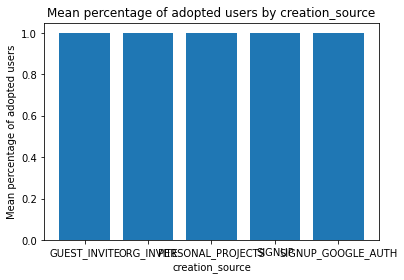

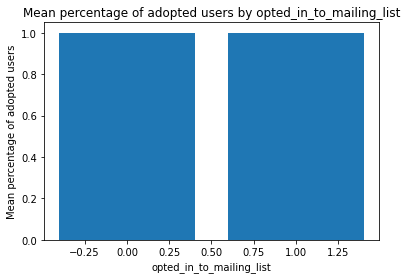

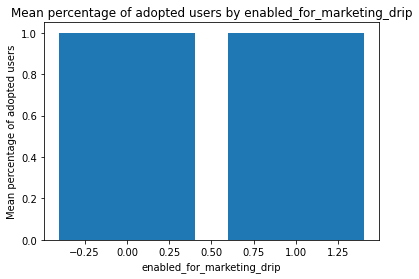

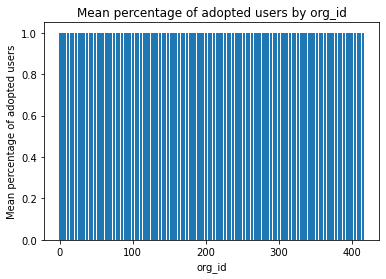

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load user engagement data
engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

# Load user data
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1', parse_dates=['creation_time'])

# Merge the two data frames
df = engagement.merge(users, left_on='user_id', right_on='object_id')

# Define adopted users
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
adopted_users = []
for user in df['user_id'].unique():
    user_df = df[df['user_id'] == user].set_index('time_stamp')
    user_df = user_df.resample('D').sum().fillna(0)
    adopted = (user_df.rolling(window=7, min_periods=1).sum() >= 3).any(axis=1).sum()
    if adopted:
        adopted_users.append(user)

# Add a new column to indicate adopted users
df['adopted_user'] = df['user_id'].apply(lambda x: x in adopted_users)

# Factors that predict user adoption
factors = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id']
for factor in factors:
    factor_df = df.groupby(factor)['adopted_user'].mean().sort_values(ascending=False)
    plt.figure()
    plt.bar(factor_df.index, factor_df.values)
    plt.title('Mean percentage of adopted users by {}'.format(factor))
    plt.xlabel(factor)
    plt.ylabel('Mean percentage of adopted users')
    plt.show()